**CSE-221710304057-T.Snithika Patel**

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
type(train_labels)

numpy.ndarray

In [4]:
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

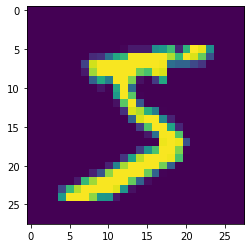

In [6]:
plt.imshow(train_digits[0])

In [7]:
sample=np.random.randint(train_digits.shape[0],size=16)
sample

array([22154, 42665,  3326, 21324, 26593, 13378, 28370,     2, 32862,
       58634, 33422, 21831,   209,  2293, 15848, 40948])

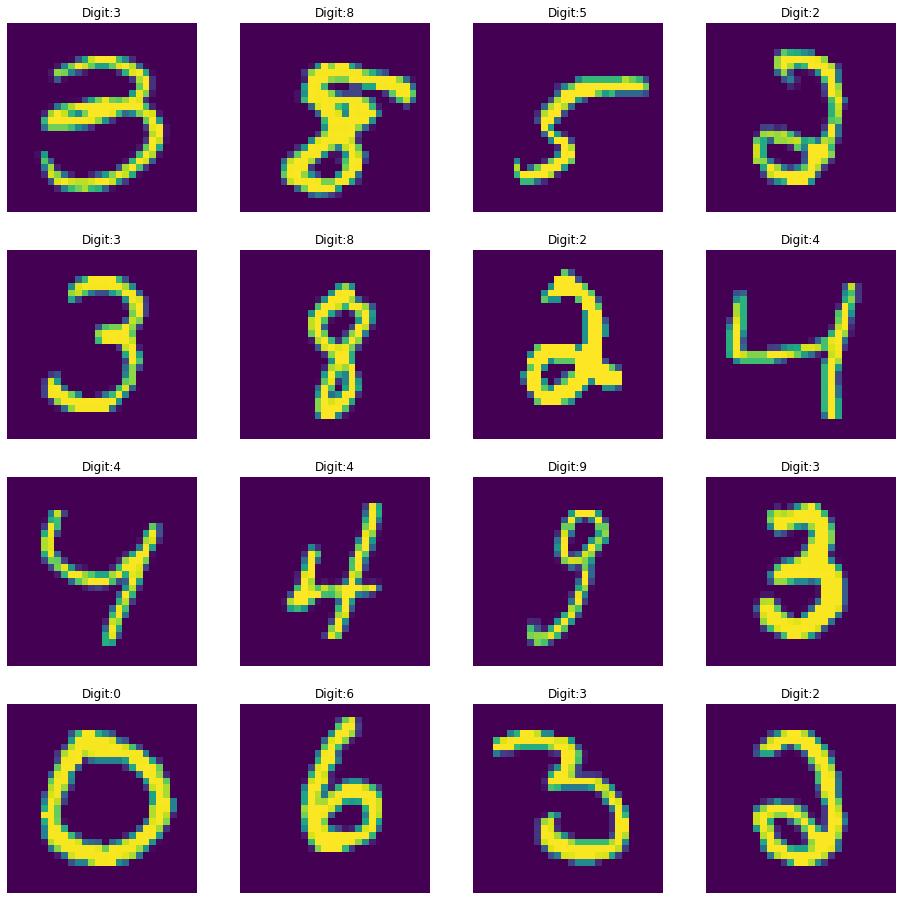

In [8]:
plt.figure(figsize=(16,16))
j=1
for i in sample:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j += 1

In [9]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [10]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [11]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat=to_categorical(test_labels)
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


Model 1

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.2474 - accuracy: 0.9244 - val_loss: 0.1306 - val_accuracy: 0.9637
Epoch 2/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.1127 - accuracy: 0.9651 - val_loss: 0.1117 - val_accuracy: 0.9673
Epoch 3/5
54000/54000 [==============================] - 6s 108us/step - loss: 0.0801 - accuracy: 0.9753 - val_loss: 0.1206 - val_accuracy: 0.9655
Epoch 4/5
54000/54000 [==============================] - 6s 106us/step - loss: 0.0650 - accuracy: 0.9794 - val_loss: 0.1041 - val_accuracy: 0.9710
Epoch 5/5
54000/54000 [==============================] - 6s 106us/step - loss: 0.0530 - accuracy: 0.9830 - val_loss: 0.0961 - val_accuracy: 0.9742


In [16]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 30us/step


[0.08284994839697028, 0.9767000079154968]

In [17]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [18]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.4695181e-08, 4.0090708e-06, 3.2524040e-05, 1.7948853e-04,
        1.4501674e-07, 3.3973362e-07, 3.4808162e-10, 9.9955696e-01,
        4.2292127e-06, 2.2242962e-04]], dtype=float32)

In [19]:
model.predict(test_digits_sc[:10])

array([[1.46952086e-08, 4.00908220e-06, 3.25241308e-05, 1.79489041e-04,
        1.45016870e-07, 3.39734243e-07, 3.48082951e-10, 9.99556959e-01,
        4.22922449e-06, 2.22429837e-04],
       [2.30647128e-08, 1.11433947e-08, 9.99997020e-01, 8.53131610e-07,
        9.60971969e-10, 2.84684887e-10, 3.26016592e-09, 2.40097449e-07,
        1.85311796e-06, 1.94598955e-11],
       [3.25233918e-06, 9.98946726e-01, 3.09896481e-04, 1.44677767e-06,
        6.43450985e-05, 2.09917234e-05, 5.20315778e-04, 2.47626886e-05,
        1.01674872e-04, 6.68946268e-06],
       [9.98523295e-01, 2.06043353e-07, 2.31885017e-04, 3.85638159e-05,
        2.97769384e-05, 3.32357813e-05, 4.74970002e-05, 4.53808798e-06,
        4.64083678e-05, 1.04461971e-03],
       [2.65392345e-07, 2.47789158e-05, 1.43039404e-06, 6.42231157e-08,
        9.99272525e-01, 2.93267107e-07, 4.76866262e-06, 1.41051089e-06,
        8.03890259e-07, 6.93676178e-04],
       [5.92084177e-08, 9.99956369e-01, 1.16556666e-05, 2.01211492e-08,
   

In [20]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [21]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.4695181e-08, 4.0090708e-06, 3.2524040e-05, 1.7948853e-04,
        1.4501674e-07, 3.3973362e-07, 3.4808162e-10, 9.9955696e-01,
        4.2292127e-06, 2.2242962e-04]], dtype=float32)

In [22]:
history.history

{'accuracy': [0.92444444, 0.96507406, 0.97525924, 0.97944444, 0.9830185],
 'loss': [0.24741093381908205,
  0.11274067925013326,
  0.08008100585239353,
  0.06503033189754934,
  0.05304406244648379],
 'val_accuracy': [0.9636666774749756,
  0.9673333168029785,
  0.965499997138977,
  0.9710000157356262,
  0.9741666913032532],
 'val_loss': [0.1306381452033917,
  0.11173898075769345,
  0.1206223667152226,
  0.10414025109726936,
  0.09606869810260832]}

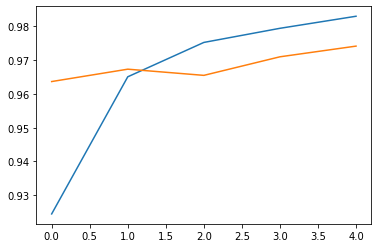

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Model 2

In [24]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [25]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 121us/step - loss: 0.2574 - accuracy: 0.9205 - val_loss: 0.1447 - val_accuracy: 0.9597
Epoch 2/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.1100 - accuracy: 0.9664 - val_loss: 0.1347 - val_accuracy: 0.9650
Epoch 3/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.0810 - accuracy: 0.9750 - val_loss: 0.1088 - val_accuracy: 0.9703
Epoch 4/5
54000/54000 [==============================] - 7s 123us/step - loss: 0.0631 - accuracy: 0.9799 - val_loss: 0.0987 - val_accuracy: 0.9750
Epoch 5/5
54000/54000 [==============================] - 7s 129us/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0972 - val_accuracy: 0.9748


In [26]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.08259001769350142, 0.9779999852180481]

In [27]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [28]:
model1.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.3101516e-07, 3.5045196e-07, 4.6717923e-06, 1.7447202e-05,
        1.4145212e-06, 5.1498752e-09, 2.0036991e-13, 9.9957317e-01,
        5.8719439e-07, 1.1093782e-04]], dtype=float32)

In [29]:
model1.predict(test_digits_sc[:10])

array([[1.3101528e-07, 3.5045196e-07, 4.6717660e-06, 1.7447186e-05,
        1.4145253e-06, 5.1499049e-09, 2.0037031e-13, 9.9957311e-01,
        5.8719382e-07, 1.1093782e-04],
       [4.4254531e-07, 1.1825030e-07, 9.9985516e-01, 8.8893703e-06,
        1.3175347e-06, 7.8076465e-07, 1.4952928e-07, 1.0012112e-05,
        3.0842523e-06, 3.1094118e-08],
       [2.1809563e-09, 9.9946356e-01, 3.6209822e-04, 2.9602638e-06,
        2.0136752e-06, 9.6356653e-06, 1.9446015e-04, 3.5147215e-05,
        2.2283196e-04, 7.8137248e-07],
       [9.9975199e-01, 2.1490827e-08, 4.0627441e-05, 1.3452768e-04,
        4.5911045e-05, 5.1818886e-05, 1.7401671e-05, 6.3879224e-06,
        2.4872875e-06, 1.7404556e-04],
       [3.3314768e-06, 1.4491889e-06, 2.7910719e-05, 1.0945985e-07,
        9.9988127e-01, 6.5464491e-07, 4.0209990e-05, 1.2280055e-05,
        7.8203338e-06, 1.0148306e-04],
       [2.9290137e-10, 9.9981624e-01, 8.0954005e-06, 2.4986815e-07,
        1.0322541e-06, 4.1193957e-08, 8.9341856e-06, 4.22

In [30]:
model1.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [31]:
model1.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.3101516e-07, 3.5045196e-07, 4.6717923e-06, 1.7447202e-05,
        1.4145212e-06, 5.1498752e-09, 2.0036991e-13, 9.9957317e-01,
        5.8719439e-07, 1.1093782e-04]], dtype=float32)

In [32]:
history.history

{'accuracy': [0.9205185, 0.96635187, 0.9750185, 0.97992593, 0.98433334],
 'loss': [0.2574165452580761,
  0.10997969186864794,
  0.08096355000724671,
  0.06314206538833592,
  0.050781626388965245],
 'val_accuracy': [0.9596666693687439,
  0.9649999737739563,
  0.9703333377838135,
  0.9750000238418579,
  0.9748333096504211],
 'val_loss': [0.1446960342377424,
  0.13466085685168702,
  0.1088065585847944,
  0.09865366327452163,
  0.0971526457608367]}

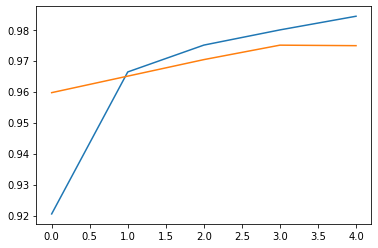

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

- The accuarcy and Val_Accuracy of the model 1 is :[0.10071307541152345, 0.9724000096321106]
- The accuarcy andVal_Accuracy of the model 2 is :[0.10321083835801109, 0.9724000096321106]
- Hence model 2 is best than model 1